# 패키지

In [1]:
#!pip3 install konlpy
!pip install wordcloud
!pip install nltk
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download("stopwords")
from wordcloud import WordCloud
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics import pairwise_distances
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from pylab import plot, show, legend, title, xlabel, ylabel
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from nltk.corpus import words
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /home/lab01/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/lab01/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lab01/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 데이터 불러오기

In [262]:
os.chdir(r'C:\Users\Master\Desktop\K_culture')

In [2]:
tweets = pd.read_csv('twitter_0516_fin.csv')
tweets.columns = ['tweets','date','id']

In [3]:
# 날짜 관련 함수 정의
def twitterDateProcessing(date):
    if(len(date) < 8):
        return ('2019년 ' + date)
    else:
        return date

In [4]:
# 년도 안 붙어 있는 날짜 처리
tweets['date'] = tweets['date'].apply(lambda x: twitterDateProcessing(x))

# 공백 제거
# 날짜가 이상한거 제거 ex) 1일, 2일 월도없이 중간중간에 있는것들
tweets = tweets[(tweets['tweets'] != '') & (tweets['date'].str.len() >= 10)]

# 날짜 처리
tweets['date'] = tweets['date'].apply(lambda x: x.replace('년 ','/'))
tweets['date'] = tweets['date'].apply(lambda x: x.replace('월 ','/'))
tweets['date'] = tweets['date'].apply(lambda x: x.replace('일',''))
tweets['date'] = tweets['date'].apply(lambda x: datetime.strptime("/".join(re.findall('\d+', x)), '%Y/%m/%d').strftime('%Y%m%d'))
tweets['year'] = tweets['date'].apply(lambda x: x[0:4])
tweets['month'] = tweets['date'].apply(lambda x: x[4:6])
tweets['date'] = tweets['date'].apply(lambda x: int(x))

# 분기 추가
tweets['quarter'] = tweets['month'].apply(lambda x: ((int(x)-1)//3 + 1))

# 전처리

## 영어만 남기기

In [5]:
tweets2 = tweets.copy()

# 한글처리된거 먼저 제거
tweets2 = tweets2['tweets'].apply(lambda x: re.sub('[^가-힣]',' ',str(x)).strip())

try:
    tweets = tweets.iloc[tweets2[tweets2.str.len()== 0].index]
except:
    pass

# 소문자화 
tweets['tweets'] = tweets['tweets'].apply(lambda x: str(x).lower())

# http 및 불용어 제거
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('vnd|status|share|com|via|aku|photo|link|http|https|jpg|twitter|jpg|instagram|www|weibo|the|posts','', str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('pemenang|untunk|orang|poem|lake|isle','', str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('caixukun|chenlinong|fanchengcheng','', str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('rt|dm','', str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('/s+',' ', str(x)))

# 비슷한 의미의 단어들 한 단어로 통일시키기
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lee minho|lee min ho|actorleeminho|minoz','leeminho',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('yoon a','yoona',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('wanna one|wan na one','wannaone',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('cleaning|cleanser','cleansing',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('creaming|creams','cream',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('handscream','handcream',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('packs','pack',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('posters','poster',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('kits','kit',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('reviews','review',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('videos','video',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('joankeem','joan',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('from|with|this|that','',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('alwaysleeminho','',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('give away','giveaway',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lip balm','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lip balms','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lipbalms','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lipbalm','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lipstick','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lip concealer','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lip cheek','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lip cream','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lipcream','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lip tint','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('liptint','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lipgloss','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lips','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lipglow','lip',str(x)))   
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lipstik','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lip glow','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('no sebum','nosebum',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('girls generation|girlsgeneration','snsd',str(x)))


# 영어만 남기기. 특수문자 제거
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('[^a-zA-Z]',' ',str(x)).strip())

temp = [130,1864,2166,226,429,484, 509,614,646,690, 696,792,905,1045,1120,1274,1625,1857,1883,2382,2797,3062,3180,7072]

for x in temp:
    tweets = tweets.drop(x)

only_en_tweets = tweets[tweets['tweets'] != '']
only_en_tweets = only_en_tweets[only_en_tweets['date'] >= 20150101]

In [6]:
# only_en_tweets[only_en_tweets['tweets'].str.find("sebum")>0]

## 댓글 변수 kmeans 클러스터링

In [7]:
tweets = only_en_tweets['tweets']

In [8]:
tweets_com = []
lemmatizer = WordNetLemmatizer()
for line in tweets:
    pre = re.sub(r'\W', ' ', str(line))                                  # 특수문자 제외. Space로 대체!
    pre = re.sub(r'_', ' ', pre)                                    # 특수문자 제외. Space로 대체!
    pre = re.sub(r'\d+','', pre)                                    # 숫자제외
    pre = re.sub(r'이니스프리','', pre)  
    pre = re.sub(r'innisfree','', pre)
    pre = lemmatizer.lemmatize(pre)
    pre = pre.lower()                                      
    tweets_com.append(pre)     

### TF-IDF 생성

In [9]:
len(tweets)

5642

In [10]:
vectorizer = TfidfVectorizer(max_features = 1000000, min_df = 100, max_df = 1000, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(tweets_com).toarray()

In [11]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 단어 확인

In [12]:
len(vectorizer.get_feature_names())

30

In [13]:
print(vectorizer.get_feature_names())

['cf', 'ch', 'clay', 'cr', 'cream', 'day', 'event', 'gi', 'giveaway', 'green', 'howtoperfect', 'jeju', 'leeminho', 'lip', 'mask', 'new', 'ng', 'pic', 'sale', 'seed', 'serum', 'snsd', 'tea', 'tr', 'update', 'video', 'volcanic', 'wannaone', 'yoona', 'youtube']


### 코사인 유사도 생성 

In [39]:
X = 1 - np.round(pairwise_distances(X, metric="cosine"),3)

### kmeans 모델링 

In [40]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### 클러스터 별 댓글 갯수 확인

In [41]:
pd.Series(kmeans.labels_).value_counts()

0    3814
2     727
1     561
3     540
dtype: int64

#### 클러스터 별 댓글 확인

# 총 다큐먼트 갯수 
len(kmeans.labels_)

In [42]:
res = pd.Series(kmeans.labels_)
group_0 = pd.DataFrame(tweets_com)[res==0]
group_1 = pd.DataFrame(tweets_com)[res==1]
group_2 = pd.DataFrame(tweets_com)[res==2]
group_3 = pd.DataFrame(tweets_com)[res==3]

# 워드 클라우드로 집단별 군집 확인

### group_0

In [43]:
tw = group_0
n_min = 3                                                           # 최소 문자 개수. 
corpus_tw_0 = []
lemmatizer = WordNetLemmatizer()

for line in tw[0]:
    pre = str(line)                                # 특수문자 제외.
    pre = pre.lower()
    pre = nltk.word_tokenize(pre)
    pre = [x for x in pre if len(x) > n_min]                        # 최소 길이 충족.
    pre = [lemmatizer.lemmatize(x) for x in pre]                    # 원형 복원.
    corpus_tw_0 += pre

In [44]:
len(corpus_tw_0)

21315

In [45]:
tw = group_1
n_min = 3                                                           # 최소 문자 개수. 
corpus_tw_1 = []
lemmatizer = WordNetLemmatizer()

for line in tw[0]:
    pre = str(line)                                # 특수문자 제외.
    pre = pre.lower()
    pre = nltk.word_tokenize(pre)
    pre = [x for x in pre if len(x) > n_min]                        # 최소 길이 충족.
    pre = [lemmatizer.lemmatize(x) for x in pre]                    # 원형 복원.
    corpus_tw_1 += pre

In [46]:
len(corpus_tw_1)

2512

In [47]:
tw = group_2
n_min = 3                                                           # 최소 문자 개수. 
corpus_tw_2 = []
lemmatizer = WordNetLemmatizer()

for line in tw[0]:
    pre = str(line)                                # 특수문자 제외.
    pre = pre.lower()
    pre = nltk.word_tokenize(pre)
    pre = [x for x in pre if len(x) > n_min]                        # 최소 길이 충족.
    pre = [lemmatizer.lemmatize(x) for x in pre]                    # 원형 복원.
    corpus_tw_2 += pre

In [48]:
len(corpus_tw_2)

3576

In [49]:
tw = group_3
n_min = 3                                                           # 최소 문자 개수. 
corpus_tw_3 = []
lemmatizer = WordNetLemmatizer()

for line in tw[0]:
    pre = str(line)                                # 특수문자 제외.
    pre = pre.lower()
    pre = nltk.word_tokenize(pre)
    pre = [x for x in pre if len(x) > n_min]                        # 최소 길이 충족.
    pre = [lemmatizer.lemmatize(x) for x in pre]                    # 원형 복원.
    corpus_tw_3 += pre

#### 단어빈도 카운팅

In [50]:
#코사인 유사도 포함
freq_0 = nltk.FreqDist(corpus_tw_0)
freq_0.most_common(20)
freq_1 = nltk.FreqDist(corpus_tw_1)
freq_1.most_common(20)
freq_2 = nltk.FreqDist(corpus_tw_2)
freq_2.most_common(20)
freq_3 = nltk.FreqDist(corpus_tw_3)
freq_3.most_common(20)

print('group_0')
for i,j in enumerate(freq_0.most_common(20)) :
    print(f'{i}: {j}')

print('group_1')
for i,j in enumerate(freq_1.most_common(20)) :
    print(f'{i}: {j}')

print('group_2')
for i,j in enumerate(freq_2.most_common(20)) :
    print(f'{i}: {j}')
    
print('group_3')
for i,j in enumerate(freq_3.most_common(20)) :
    print(f'{i}: {j}')

group_0
0: ('mask', 298)
1: ('green', 249)
2: ('sale', 194)
3: ('jeju', 180)
4: ('youtube', 170)
5: ('howtoperfect', 145)
6: ('giveaway', 139)
7: ('serum', 135)
8: ('video', 124)
9: ('volcanic', 119)
10: ('clay', 118)
11: ('seed', 113)
12: ('cream', 107)
13: ('cleansing', 94)
14: ('skin', 92)
15: ('pack', 89)
16: ('like', 83)
17: ('sleeping', 79)
18: ('ninepercent', 78)
19: ('pore', 77)
group_1
0: ('leeminho', 882)
1: ('good', 40)
2: ('green', 38)
3: ('wallpaper', 38)
4: ('summer', 35)
5: ('have', 30)
6: ('christmas', 30)
7: ('morning', 29)
8: ('love', 27)
9: ('jeju', 25)
10: ('youtube', 25)
11: ('update', 24)
12: ('festa', 22)
13: ('thailand', 21)
14: ('mymenteainment', 20)
15: ('minho', 19)
16: ('happy', 17)
17: ('fighting', 17)
18: ('everyone', 16)
19: ('philippine', 15)
group_2
0: ('wannaone', 921)
1: ('kangdaniel', 66)
2: ('jeju', 51)
3: ('daniel', 37)
4: ('poster', 32)
5: ('good', 30)
6: ('event', 28)
7: ('sale', 25)
8: ('update', 25)
9: ('parkjihoon', 24)
10: ('video', 24)
11: (

In [37]:
freq_0 = nltk.FreqDist(corpus_tw_0)
freq_0.most_common(20)
freq_1 = nltk.FreqDist(corpus_tw_1)
freq_1.most_common(20)
freq_2 = nltk.FreqDist(corpus_tw_2)
freq_2.most_common(20)
freq_3 = nltk.FreqDist(corpus_tw_3)
freq_3.most_common(20)

print('group_0')
for i,j in enumerate(freq_0.most_common(20)) :
    print(f'{i}: {j}')

print('group_1')
for i,j in enumerate(freq_1.most_common(20)) :
    print(f'{i}: {j}')

print('group_2')
for i,j in enumerate(freq_2.most_common(20)) :
    print(f'{i}: {j}')
    
print('group_3')
for i,j in enumerate(freq_3.most_common(20)) :
    print(f'{i}: {j}')

group_0
0: ('mask', 305)
1: ('green', 250)
2: ('sale', 194)
3: ('jeju', 183)
4: ('youtube', 175)
5: ('howtoperfect', 146)
6: ('giveaway', 144)
7: ('serum', 137)
8: ('video', 131)
9: ('volcanic', 119)
10: ('clay', 118)
11: ('seed', 114)
12: ('cream', 107)
13: ('cleansing', 94)
14: ('skin', 92)
15: ('pack', 89)
16: ('like', 83)
17: ('sleeping', 79)
18: ('ninepercent', 78)
19: ('pore', 77)
group_1
0: ('yoona', 662)
1: ('snsd', 115)
2: ('promotion', 61)
3: ('calendar', 47)
4: ('wallpaper', 45)
5: ('youtube', 40)
6: ('event', 29)
7: ('love', 25)
8: ('findyoona', 19)
9: ('whenwindblows', 18)
10: ('leeminho', 18)
11: ('summer', 18)
12: ('singapore', 17)
13: ('promo', 15)
14: ('sowonderfulday', 15)
15: ('toyou', 15)
16: ('mobile', 14)
17: ('jakaa', 14)
18: ('video', 14)
19: ('cushion', 14)
group_2
0: ('leeminho', 865)
1: ('good', 39)
2: ('green', 38)
3: ('wallpaper', 38)
4: ('christmas', 30)
5: ('morning', 28)
6: ('have', 28)
7: ('summer', 26)
8: ('jeju', 25)
9: ('youtube', 25)
10: ('update', 

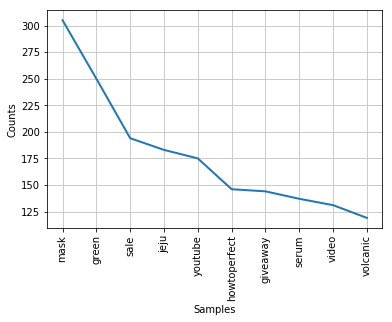

In [38]:
freq_0.plot(10)

#### Biagram 빈도 카운팅

In [51]:
print('group_0')
bigrams_0 = nltk.bigrams(corpus_tw_0)
freq_bi_0 = nltk.FreqDist(bigrams_0)
for i,j in enumerate(freq_bi_0.most_common(20)) :
    print(f'{i}: {j}')

print('group_1')
bigrams_1 = nltk.bigrams(corpus_tw_1)
freq_bi_1 = nltk.FreqDist(bigrams_1)
for i,j in enumerate(freq_bi_1.most_common(20)) :
    print(f'{i}: {j}')

print('group_2')
bigrams_2 = nltk.bigrams(corpus_tw_2)
freq_bi_2 = nltk.FreqDist(bigrams_2)
for i,j in enumerate(freq_bi_2.most_common(20)) :
    print(f'{i}: {j}')
    
print('group_3')
bigrams_3 = nltk.bigrams(corpus_tw_3)
freq_bi_3 = nltk.FreqDist(bigrams_3)
for i,j in enumerate(freq_bi_3.most_common(20)) :
    print(f'{i}: {j}')

group_0
0: (('clay', 'mask'), 101)
1: (('green', 'seed'), 89)
2: (('seed', 'serum'), 88)
3: (('youtube', 'video'), 63)
4: (('liked', 'youtube'), 62)
5: (('sleeping', 'pack'), 59)
6: (('jeju', 'volcanic'), 57)
7: (('volcanic', 'pore'), 42)
8: (('sheet', 'mask'), 42)
9: (('mineral', 'powder'), 41)
10: (('super', 'volcanic'), 40)
11: (('nine', 'percent'), 40)
12: (('xanh', 'green'), 40)
13: (('jeju', 'house'), 39)
14: (('protection', 'cream'), 37)
15: (('nosebum', 'mineral'), 36)
16: (('color', 'clay'), 36)
17: (('cleansing', 'foam'), 35)
18: (('vivid', 'cotton'), 35)
19: (('pore', 'clay'), 31)
group_1
0: (('leeminho', 'leeminho'), 360)
1: (('green', 'christmas'), 26)
2: (('leeminho', 'wallpaper'), 24)
3: (('summer', 'love'), 24)
4: (('good', 'morning'), 23)
5: (('leeminho', 'good'), 21)
6: (('leeminho', 'green'), 21)
7: (('leeminho', 'summer'), 21)
8: (('update', 'leeminho'), 17)
9: (('fighting', 'leeminho'), 17)
10: (('youtube', 'leeminho'), 17)
11: (('leeminho', 'mymenteainment'), 14)


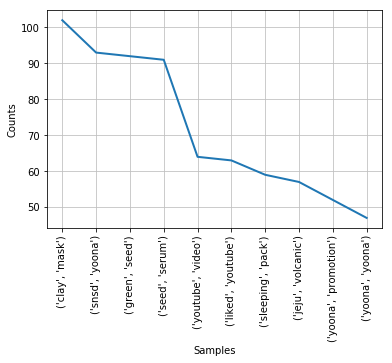

In [317]:
freq_bi_0.plot(10)

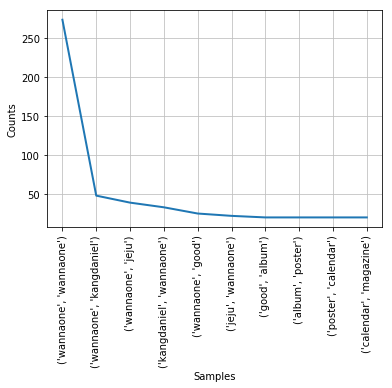

In [318]:
freq_bi_1.plot(10)

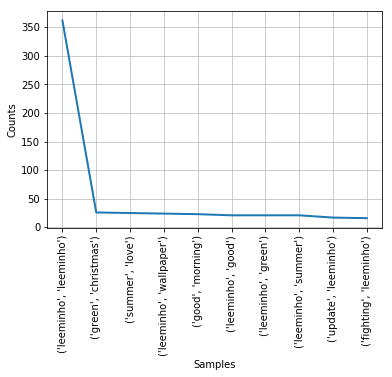

In [319]:
freq_bi_2.plot(10)

#### trigram 빈도 카운팅

In [52]:
print('group_0')
trigrams_0 = nltk.trigrams(corpus_tw_0)
freq_tri_0 = nltk.FreqDist(trigrams_0)
for i,j in enumerate(freq_tri_0.most_common(20)) :
    print(f'{i}: {j}')

print('group_1')
trigrams_1 = nltk.trigrams(corpus_tw_1)
freq_tri_1 = nltk.FreqDist(trigrams_1)
for i,j in enumerate(freq_tri_1.most_common(20)) :
    print(f'{i}: {j}')

print('group_2')
trigrams_2 = nltk.trigrams(corpus_tw_2)
freq_tri_2 = nltk.FreqDist(trigrams_2)
for i,j in enumerate(freq_tri_2.most_common(20)) :
    print(f'{i}: {j}')
    
print('group_3')
trigrams_3 = nltk.trigrams(corpus_tw_3)
freq_tri_3 = nltk.FreqDist(trigrams_3)
for i,j in enumerate(freq_tri_3.most_common(20)) :
    print(f'{i}: {j}')

group_0
0: (('green', 'seed', 'serum'), 69)
1: (('liked', 'youtube', 'video'), 62)
2: (('color', 'clay', 'mask'), 35)
3: (('volcanic', 'pore', 'clay'), 31)
4: (('nosebum', 'mineral', 'powder'), 31)
5: (('pore', 'clay', 'mask'), 30)
6: (('real', 'squeeze', 'mask'), 23)
7: (('super', 'volcanic', 'pore'), 22)
8: (('green', 'cleansing', 'foam'), 22)
9: (('daily', 'protection', 'cream'), 22)
10: (('sleeping', 'pack', 'sale'), 22)
11: (('jeju', 'volcanic', 'color'), 21)
12: (('volcanic', 'color', 'clay'), 21)
13: (('seed', 'serum', 'special'), 20)
14: (('cleansing', 'foam', 'sale'), 20)
15: (('jeju', 'volcanic', 'pore'), 19)
16: (('xanh', 'green', 'cleansing'), 19)
17: (('whitening', 'pore', 'sleeping'), 19)
18: (('pore', 'sleeping', 'pack'), 19)
19: (('auto', 'eyebrow', 'pencil'), 18)
group_1
0: (('leeminho', 'leeminho', 'leeminho'), 135)
1: (('leeminho', 'green', 'christmas'), 19)
2: (('leeminho', 'good', 'morning'), 14)
3: (('leeminho', 'summer', 'love'), 14)
4: (('leeminho', 'leeminho', 

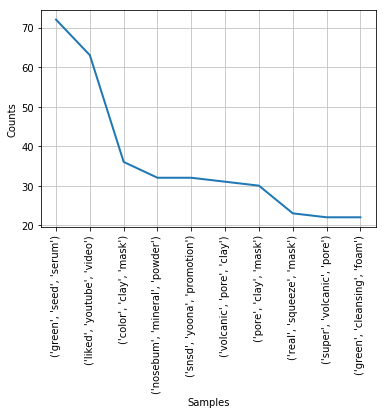

In [321]:
freq_tri_0.plot(10)

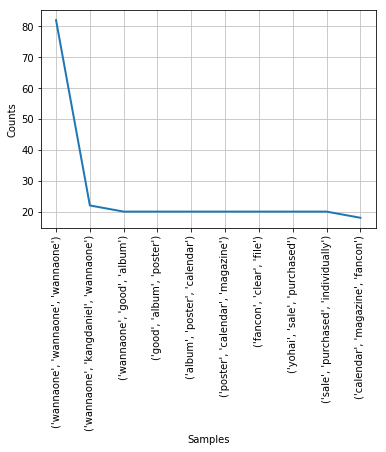

In [322]:
freq_tri_1.plot(10)

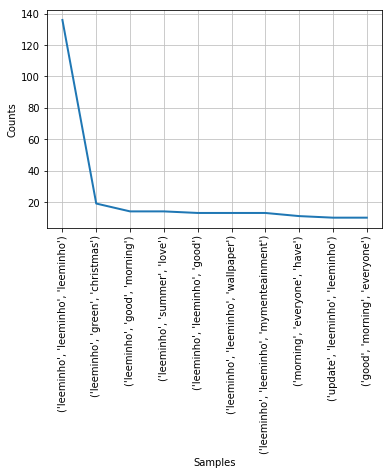

In [323]:
freq_tri_2.plot(10)

## 이상 키워드 확인

In [ ]:
only_en_tweets.loc[2956]['tweets']

In [ ]:
tweets.loc[6190]['tweets']

In [ ]:
only_en_tweets[only_en_tweets['tweets'].str.find('summer') > 0][20:]

In [ ]:
tweets[tweets['tweets'].str.find('summer') > 0]